Euler rotations

In [77]:
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

plt.rcParams["figure.figsize"] = [12, 12]



class Rotation(Enum):
    ROLL = 0
    PITCH = 1
    YAW = 2

class EulerRotation:

    def __init__(self, rotations):
        """
        Creates: rotations: a list of 2-element tuples (rotation kind, degrees)
            [(Rotation.ROLL, 45),(Rotation.ROLL, 20),(Rotation.YAW, 30)]
        """
        self._rotations = rotations
        self._rotations_map = {Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch,
                               Rotation.YAW : self.yaw}

        
    def roll(self, phi):
        """
        Inputs: roll angle, phi, in radians.
        Returns: roll_rotation_matrix
        """
        roll_rotation_matrix = np.array([[1, 0, 0],
                                        [0, np.cos(phi), -np.sin(phi)],
                                        [0, np.sin(phi), np.cos(phi)]])
        return roll_rotation_matrix
    
    def pitch(self, theta):
        """
        Inputs: pitch angle, theta, in radians.
        Returns: pitch rotation matrix.
        """
        pitch_rotation_matrix = np.array([[np.cos(theta), 0, np.sin(theta)],
                                          [0, 1, 0],
                                          [-np.sin(theta), 0, np.cos(theta)]])
        return pitch_rotation_matrix
    
    def yaw(self, psi):
        """
        Inputs: yaw angle, psi, in radians.
        Returns: yaw rotation matrix.
        """
        yaw_rotation_matrix = np.array([[np.cos(psi), -np.sin(psi), 0],
                                        [np.sin(psi), np.cos(psi), 0],
                                        [0, 0, 1]])
        return yaw_rotation_matrix
    
    def rotate(self):
        """
        Multiplies component transformations in sequence. Returns a composite transformation matrix.
        """
        t = np.eye(3)
        for i in range(len(self._rotations)):
            rotation = self._rotations[i][0]
            angle = np.deg2rad(self._rotations[i][1])
            t = np.matmul(self._rotations_map[rotation](angle), t)
       
        
            
        return t

# Test your code by passing in some rotation values
rotations = [  
    (Rotation.YAW, 90),
    (Rotation.ROLL, 90),
    (Rotation.PITCH, 90)
]

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)
# Should print
# Rotation matrix ...
# [[ 0.    -0.906  0.423]
#  [ 0.259  0.408  0.875]
#  [-0.966  0.109  0.235]]


Rotation matrix ...
[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]


Rotation matrix R1 ...
[[ 0.557 -0.663  0.5  ]
 [ 0.831  0.442 -0.338]
 [ 0.003  0.604  0.797]]
Rotation matrix R2 ...
[[ 0.407 -0.705  0.581]
 [ 0.789  0.592  0.166]
 [-0.46   0.391  0.797]]
Rotation matrix R3 ...
[[ 0.557 -0.766  0.321]
 [ 0.806  0.592  0.014]
 [-0.201  0.251  0.947]]


C:\Users\Ronen\AppData\Local\Temp\ipykernel_11616\4187958537.py:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


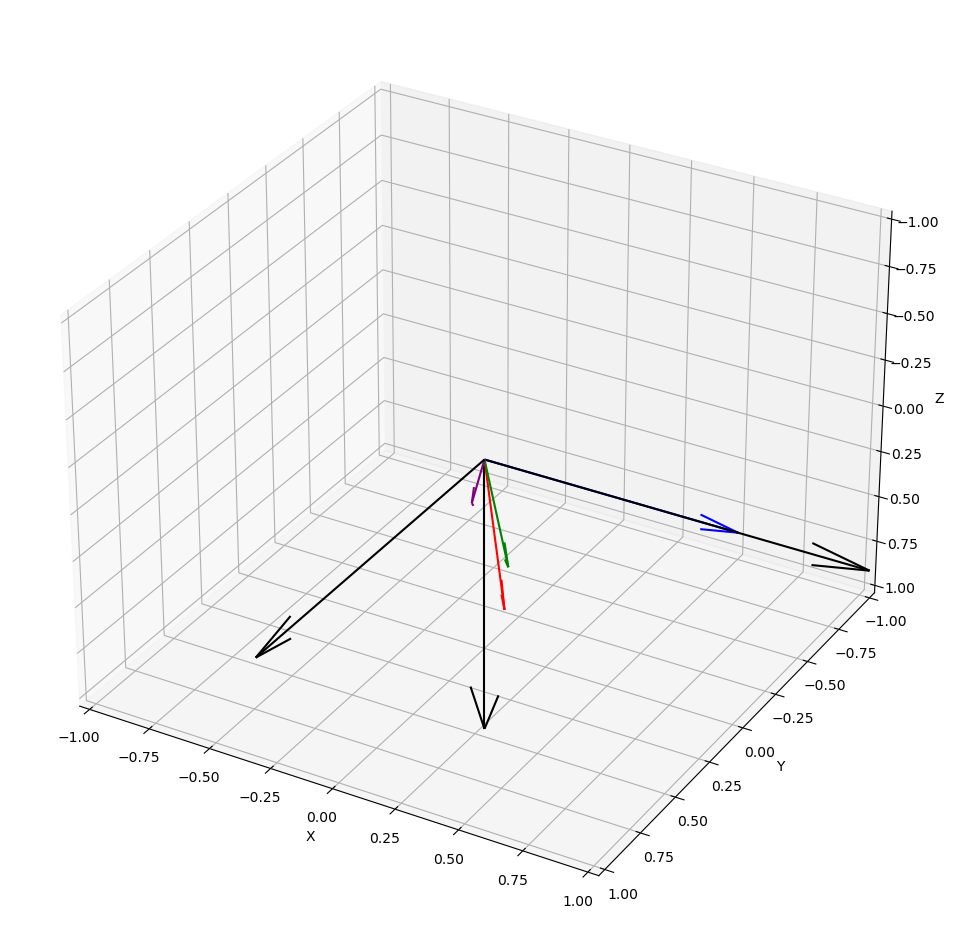

In [83]:
R1 = [
    (Rotation.YAW, 50),
    (Rotation.PITCH, 30),
    (Rotation.ROLL, 23)
]

R2 = [
    (Rotation.PITCH, 30),
    (Rotation.ROLL, 23),
    (Rotation.YAW, 50)
]

R3 = [
    (Rotation.PITCH, 30),
    (Rotation.YAW, 50),
    (Rotation.ROLL, 23)
]

R1_out = EulerRotation(R1).rotate()
print('Rotation matrix R1 ...')
print(R1_out)
R2_out = EulerRotation(R2).rotate()
print('Rotation matrix R2 ...')
print(R2_out)
R3_out = EulerRotation(R3).rotate()
print('Rotation matrix R3 ...')
print(R3_out)

v = np.array([1, 0, 0])
rv1 = np.matmul(R1_out, v)
rv2 = np.matmul(R2_out, v)
rv3 = np.matmul(R3_out, v)

fig  = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)


# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()